In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Forward simulation

In [43]:
def simulate_binomial(alpha):
    #pip3, pka
    X7, X8 = np.random.binomial(n=1, p=alpha), np.random.binomial(n=1, p=alpha)
    # print("PIP3: X7 = ", X7, " with probability", alpha)
    # print("PKA: X8 = ", X8, " with probability", alpha)
    
    ### akt <- pip3, pka
    p_X1 = 1 - alpha ** (1+X7+X8) 
    X1 = np.random.binomial(n=1, p=p_X1)
    # print("Akt: X1 = ", X1," with probability", p_X1)

    ### plcg <- pip3
    p_X10 = 1 - alpha ** (1+X7)
    X10 = np.random.binomial(n=1, p=p_X10)
    # print("Plcg: X10 = ", X10," with probability", p_X10)

    ### pip2 <- pip3, plcg
    p_X6 = 1 - alpha ** (1+X7+X10)
    X6 = np.random.binomial(n=1, p=p_X6)
    # print("PIP2: X6 = ", X6," with probability", p_X6)
    
    ### pkc <- plcg, pip2
    p_X9 = 1 - alpha ** (1+X10+X6)
    X9 = np.random.binomial(n=1, p=p_X9)
    # print("PKC: X9 = ", X9," with probability", p_X9)

    ### jnk <- pkc, pka
    p_X3 = 1 - alpha ** (1+X9+X8)
    X3 = np.random.binomial(n=1, p=p_X3)
    # print("Jnk: X3 = ", X3," with probability", p_X3)

    ### p38 <- pkc, pka
    p_X5 = 1 - alpha ** (1+X9+X8)
    X5 = np.random.binomial(n=1, p=p_X5)
    # print("P38: X5 = ", X5," with probability", p_X5)

    ### raf <- pkc, pka
    p_X11 = 1 - alpha ** (1+X9+X8)
    X11 = np.random.binomial(n=1, p=p_X11)
    # print("Raf: X11 = ", X11," with probability", p_X11)

    ### mek <- raf, pka, pkc
    p_X4 = 1 - alpha ** (1+X11+X8+X9)
    X4 = np.random.binomial(n=1, p=p_X4)
    # print("Mek: X4 = ", X4," with probability", p_X4)

    ### erk <- mek, pka
    p_X2 = 1 - alpha ** (1+X4+X8)
    X2 = np.random.binomial(n=1, p=p_X2)
    # print("Erk: X2 = ", X2," with probability", p_X2)

    return [X1, X2, X3, X4, X5, X6, X7, X8, X9, 0, 0]

simulate_binomial(0.5)


def forward(alpha, n):
    lst = []
    for elm in range(0, n):
        lst.append(simulate_binomial(alpha))
    df=pd.DataFrame(lst,columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11'])
    return(df)

df_sim_data = forward(0.5, 100)

# Variable elemination

In [44]:
edges = [('X4', 'X2'), ('X6', 'X9'), ('X9', 'X3'), ('X9', 'X4'), ('X9', 'X5'), ('X9', 'X11'), ('X7', 'X1'), ('X7', 'X6'), ('X7', 'X10'), ('X10', 'X6'), ('X10', 'X9'), ('X8', 'X1'), ('X8', 'X3'), ('X8', 'X5'), ('X8', 'X11')]

df = forward(0.5, 100)

values = df
columns = list(values.columns)
print(values.head())

   X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11
0   1   1   1   1   1   1   0   1   1    0    0
1   1   1   1   1   1   1   0   0   1    0    0
2   1   0   1   1   1   1   1   1   1    0    0
3   1   1   1   0   1   1   1   0   1    0    0
4   1   1   1   0   1   0   1   1   1    0    0


In [45]:
model = BayesianNetwork(edges)
model.fit(values)
inference = VariableElimination(model)
induced_graph = inference.induced_graph(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'])

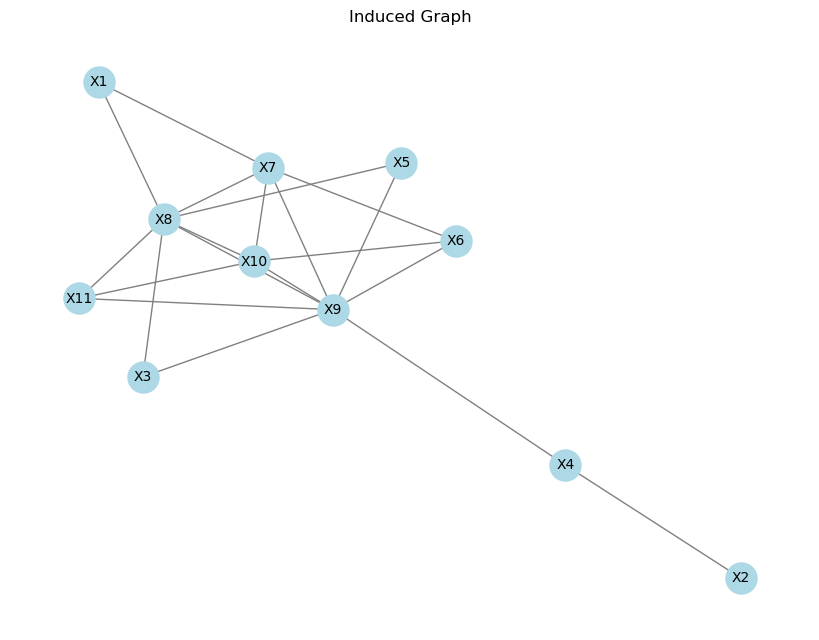

In [46]:
plt.figure(figsize=(8, 6))
nx.draw(induced_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
plt.title('Induced Graph')
plt.show()

In [47]:
evidence = {'X1': 0, 'X2': 0, 'X3': 0, 'X4': 0, 'X5': 0, 'X6': 0, 'X7': 0, 'X8': 0, 'X9': 0}
query_result_X10 = inference.query(variables=['X10'], evidence=evidence)
query_result_X11 = inference.query(variables=['X11'])
print(query_result_X10, '\n\n', query_result_X11)

+--------+------------+
| X10    |   phi(X10) |
+========+============+
| X10(0) |     1.0000 |
+--------+------------+ 

 +--------+------------+
| X11    |   phi(X11) |
+========+============+
| X11(0) |     1.0000 |
+--------+------------+
